In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
from statsmodels.tsa.deterministic import DeterministicProcess

In [3]:
dtype = {
    'store_nbr' : 'category',
    'family' : 'category',
    'sales' : 'float32',
    'onpromotion' : 'uint64',
}

store_sales = pd.read_csv( 'train.csv',
                          dtype = dtype,
                          parse_dates = ['date'],
                          infer_datetime_format = True,
                         )

store_sales = store_sales.set_index('date').to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family'], append=True)
average_sales = store_sales.groupby('date').mean()['sales']


In [3]:
y = average_sales.copy()

In [6]:
#derterministic process with cubic trend model.
dp = DeterministicProcess(index=y.index, order=3)

In [7]:
#create the feature set for the dates given in y.index
X = dp.in_sample()

In [ ]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

To make a forecast, we apply our model to "out of sample" features. "Out of sample" refers to times outside of the observation period of the training data.

In [8]:
#create features for 90 days forcast
X_fore = dp.out_of_sample(steps=90)

In [9]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [10]:
y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

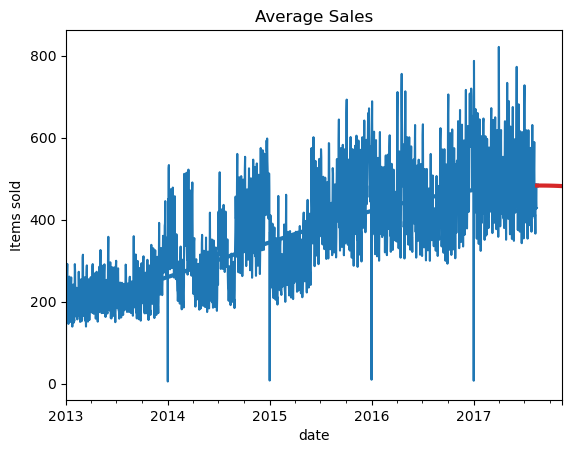

In [11]:
ax = y.plot(title="Average Sales", ylabel="Items sold")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forcast", color='C3')

What is Seasonality?¶
We say that a time series exhibits seasonality whenever there is a regular, periodic change in the mean of the series. Seasonal changes generally follow the clock and calendar -- repetitions over a day, a week, or a year are common

Seasonal indicators are binary features that represent seasonal differences in the level of a time series. Seasonal indicators are what you get if you treat a seasonal period as a categorical feature and apply one-hot encoding.

By one-hot encoding days of the week, we get weekly seasonal indicators. Linear regression works best if you drop one of the indicators. Creating weekly indicators will then give us six new "dummy" features.

Adding seasonal indicators to the training data helps models distinguish means within a seasonal period

Fourier features try to capture the overall shape of the seasonal curve with just a few features.

The idea is to include in our training data periodic curves having the same frequencies as the season we are trying to model. The curves we use are those of the trigonometric functions sine and cosine.

Choosing Fourier features with the Periodogram¶
How many Fourier pairs should we actually include in our feature set? We can answer this question with the periodogram. The periodogram tells you the strength of the frequencies in a time series. 